In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import jaccard_score #rand без учёта пар в разных кластерах и разных классах
from sklearn.metrics import rand_score #попарное сравнение принадлежат ли пары к нужным кластерам
from sklearn.metrics import calinski_harabasz_score #дисперсия кластеров к дисперсии конкретного кластера, чем больше тем лучше 
from sklearn.metrics import davies_bouldin_score #схожесть между разными кластерами, чем меньше тем лучше

In [2]:
X, y = make_classification(n_samples=1000, n_classes = 2, n_features=2, n_redundant=0, n_clusters_per_class=1, random_state=34)

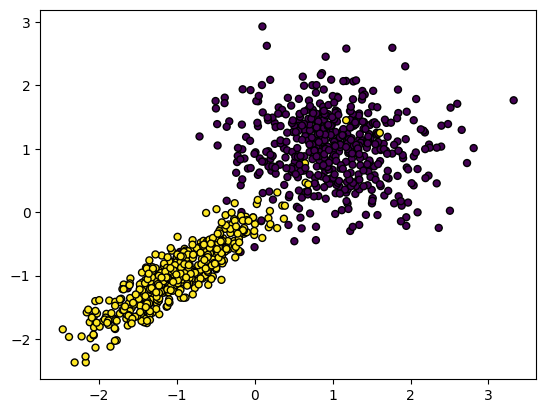

In [3]:
plt.scatter(X[:,0], X[:,1], marker="o", c=y, s=25, edgecolor="k")
plt.show()

In [4]:
X1, y1 = make_classification(n_samples=1000, n_classes = 3, n_features=2, n_redundant=0, n_clusters_per_class=1, random_state=125)

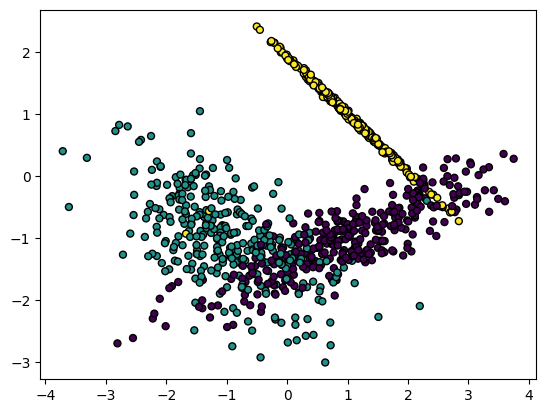

In [5]:
plt.scatter(X1[:,0], X1[:,1], marker="o", c=y1, s=25, edgecolor="k")
plt.show()

In [6]:
X2, y2 = make_classification(n_samples=1000, n_classes = 4, n_features=2, n_redundant=0, n_clusters_per_class=1, random_state=11)

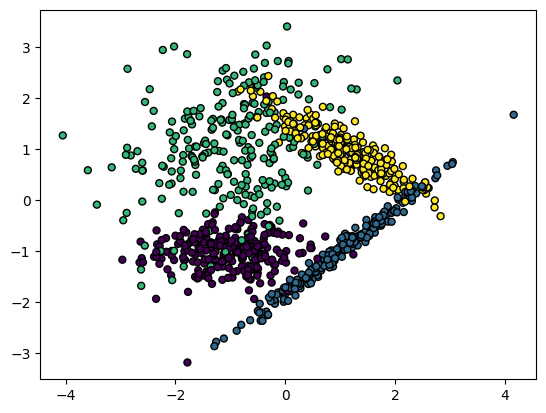

In [7]:
plt.scatter(X2[:,0], X2[:,1], marker="o", c=y2, s=25, edgecolor="k")
plt.show()

AffinityPropagation

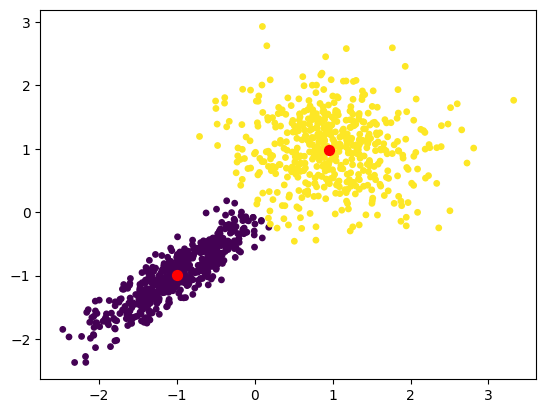

In [8]:
from sklearn.cluster import AffinityPropagation

affin = AffinityPropagation(damping=0.7, preference=-170).fit(X)

plt.scatter(X[:,0], X[:,1], c=affin.labels_, marker="o", s=15)
plt.scatter(affin.cluster_centers_[:,0], affin.cluster_centers_[:,1], s=50, c='red')

In [9]:
print("Rand", rand_score(y, affin.labels_))
print("Jaccard", jaccard_score(y, affin.labels_))
print("Calinsky_harabasz", calinski_harabasz_score(X, affin.labels_))
print("davies_bouldin", davies_bouldin_score(X, affin.labels_))

Rand 0.955013013013013
Jaccard 0.015120967741935484
Calinsky_harabasz 3377.8696286659374
davies_bouldin 0.46417364917499226


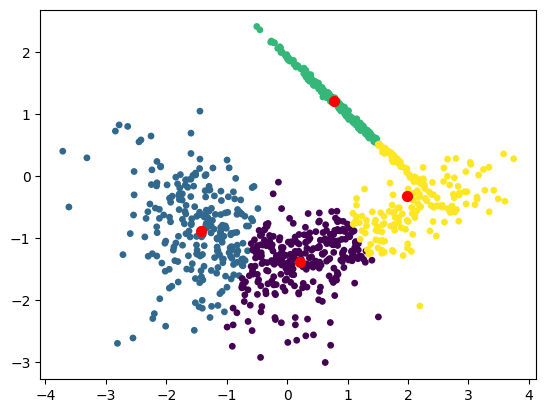

In [17]:
affin1 = AffinityPropagation(damping=0.8, preference=-200).fit(X1)

plt.scatter(X1[:,0], X1[:,1], c=affin1.labels_, marker="o", s=15)
plt.scatter(affin1.cluster_centers_[:,0], affin1.cluster_centers_[:,1], s=50, c='red')

In [105]:
print("Rand", rand_score(y1, affin1.labels_))
print("Jaccard", jaccard_score(y1, affin1.labels_, average="micro"))
print("Calinsky_harabasz", calinski_harabasz_score(X1, affin1.labels_))
print("davies_bouldin", davies_bouldin_score(X1, affin1.labels_))

Rand 0.7763603603603604
Jaccard 0.4781966001478197
Calinsky_harabasz 1453.569454640753
davies_bouldin 0.7081240646561643


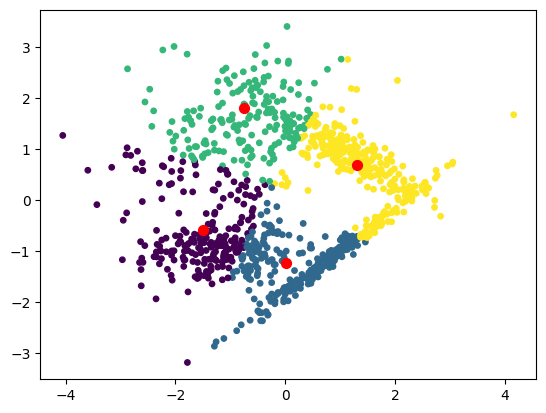

In [19]:
affin2 = AffinityPropagation(damping=0.8, preference=-290).fit(X2)

plt.scatter(X2[:,0], X2[:,1], c=affin2.labels_, marker="o", s=15)
plt.scatter(affin2.cluster_centers_[:,0], affin2.cluster_centers_[:,1], s=50, c='red')

In [104]:
print("Rand", rand_score(y2, affin2.labels_))
print("Jaccard", jaccard_score(y2, affin2.labels_, average="micro"))
print("Calinsky_harabasz", calinski_harabasz_score(X2, affin2.labels_))
print("davies_bouldin", davies_bouldin_score(X2, affin2.labels_))

Rand 0.7715335335335335
Jaccard 0.5128593040847201
Calinsky_harabasz 998.0449769341052
davies_bouldin 0.7727969209565089


KMeans

In [21]:
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
kmeans = KMeans(2, n_init='auto').fit(X)

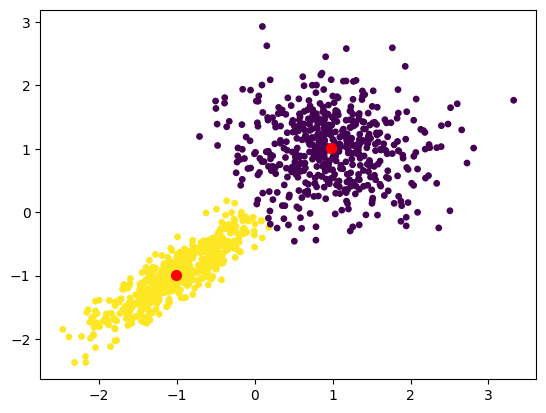

In [22]:
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, marker="o", s=15)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=50, c='red')

In [23]:
print("Rand", rand_score(y, kmeans.labels_))
print("Jaccard", jaccard_score(y, kmeans.labels_))
print("Calinsky_harabasz", calinski_harabasz_score(X, kmeans.labels_))
print("davies_bouldin", davies_bouldin_score(X, kmeans.labels_))

Rand 0.955013013013013
Jaccard 0.9546351084812623
Calinsky_harabasz 3377.8696286659374
davies_bouldin 0.46417364917499226


In [24]:
inertias = []

for i in range(2, 11):
    km = KMeans(i, n_init='auto').fit(X)
    inertias.append(km.inertia_)

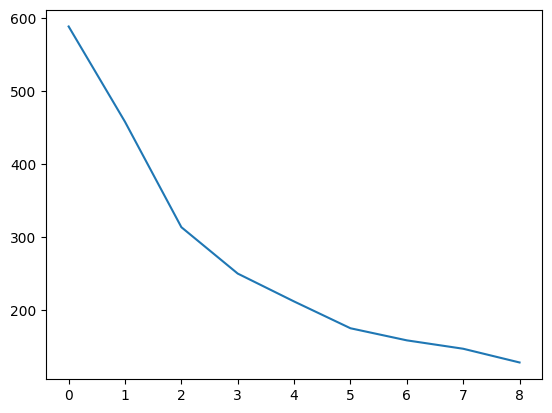

In [25]:
plt.plot(inertias)

In [26]:
ss = []

for i in range(2, 11):
    ss.append(silhouette_score(X, KMeans(i, n_init='auto').fit(X).labels_))

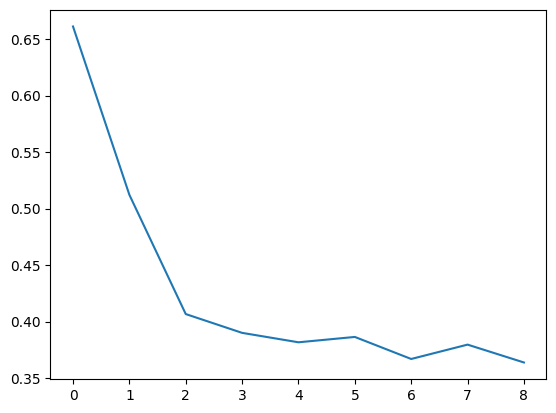

In [27]:
plt.plot(ss)

In [28]:
kmeans1 = KMeans(3, n_init='auto').fit(X1)

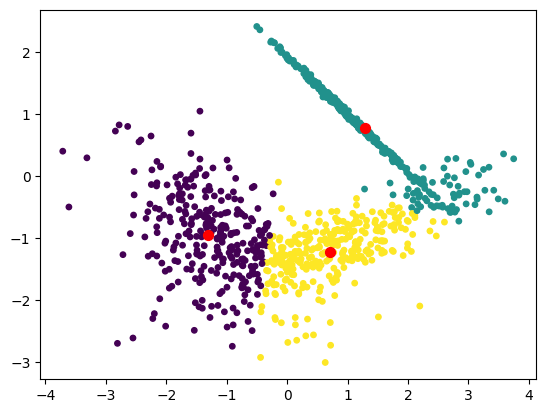

In [29]:
plt.scatter(X1[:,0], X1[:,1], c=kmeans1.labels_, marker="o", s=15)
plt.scatter(kmeans1.cluster_centers_[:,0], kmeans1.cluster_centers_[:,1], s=50, c='red')

In [103]:
print("Rand", rand_score(y1, kmeans1.labels_))
print("Jaccard", jaccard_score(y1, kmeans1.labels_, average="micro"))
print("Calinsky_harabasz", calinski_harabasz_score(X1, kmeans1.labels_))
print("davies_bouldin", davies_bouldin_score(X1, kmeans1.labels_))

Rand 0.7956056056056056
Jaccard 0.02354145342886387
Calinsky_harabasz 1094.491736507598
davies_bouldin 0.7694043311798028


In [31]:
inertias = []

for i in range(2, 11):
    km = KMeans(i, n_init='auto').fit(X1)
    inertias.append(km.inertia_)

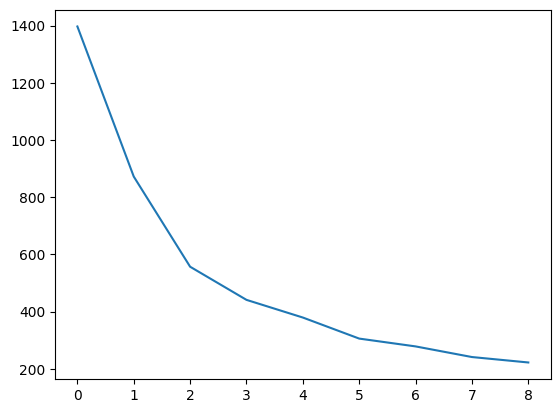

In [32]:
plt.plot(inertias)

In [33]:
ss = []

for i in range(2, 11):
    ss.append(silhouette_score(X1, KMeans(i, n_init='auto').fit(X1).labels_))

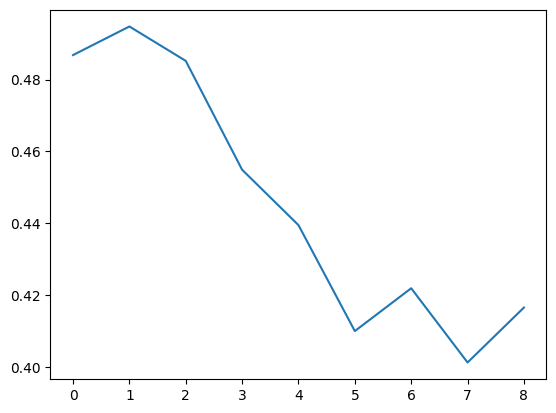

In [34]:
plt.plot(ss)

In [35]:
kmeans2 = KMeans(4, n_init='auto').fit(X2)

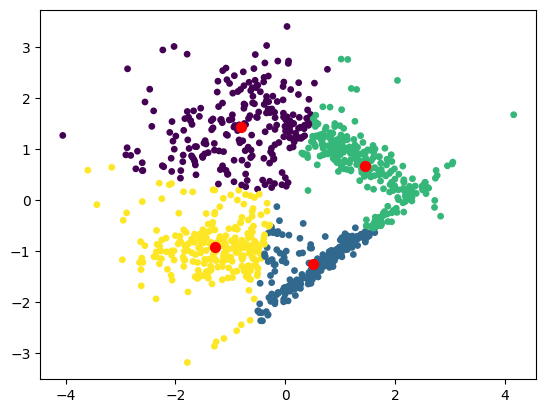

In [36]:
plt.scatter(X2[:,0], X2[:,1], c=kmeans2.labels_, marker="o", s=15)
plt.scatter(kmeans2.cluster_centers_[:,0], kmeans2.cluster_centers_[:,1], s=50, c='red')

In [102]:
print("Rand", rand_score(y2, kmeans2.labels_))
print("Jaccard", jaccard_score(y2, kmeans2.labels_, average="micro"))
print("Calinsky_harabasz", calinski_harabasz_score(X2, kmeans2.labels_))
print("davies_bouldin", davies_bouldin_score(X2, kmeans2.labels_))

Rand 0.8149049049049049
Jaccard 0.10803324099722991
Calinsky_harabasz 1033.7993006286576
davies_bouldin 0.727482322088542


In [38]:
inertias = []

for i in range(2, 11):
    km = KMeans(i, n_init='auto').fit(X2)
    inertias.append(km.inertia_)

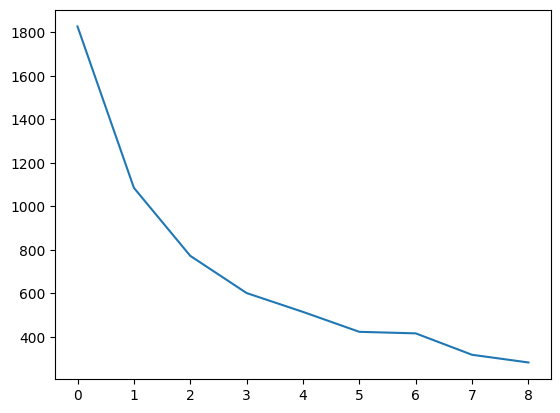

In [39]:
plt.plot(inertias)

In [40]:
ss = []

for i in range(2, 11):
    ss.append(silhouette_score(X2, KMeans(i, n_init='auto').fit(X2).labels_))

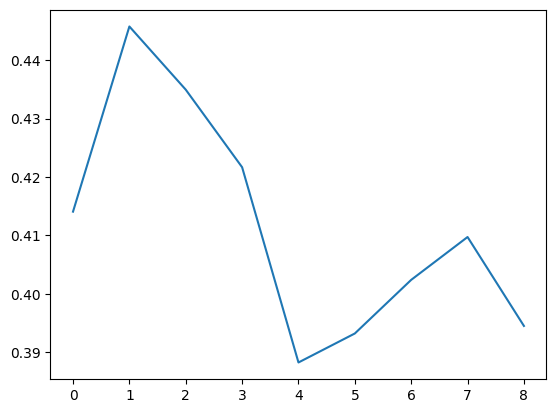

In [41]:
plt.plot(ss)

GaussianMixture

In [42]:
from sklearn.mixture import GaussianMixture

In [43]:
gm = GaussianMixture(n_components=2).fit(X)

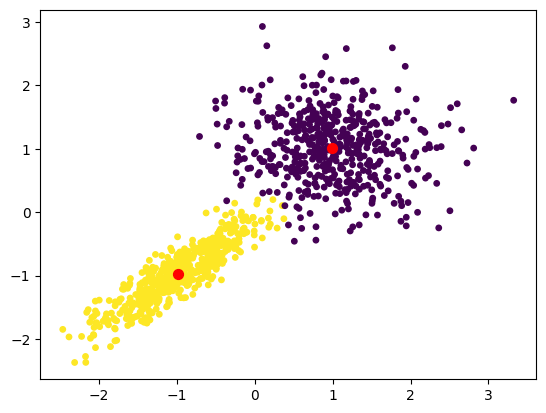

In [44]:
plt.scatter(X[:,0], X[:,1], c=gm.predict(X), marker="o", s=15)
plt.scatter(gm.means_[:,0], gm.means_[:,1], s=50, c='red')

In [101]:
print("Rand", rand_score(y, gm.predict(X)))
print("Jaccard", jaccard_score(y, gm.predict(X)))
print("Calinsky_harabasz", calinski_harabasz_score(X, gm.predict(X)))
print("davies_bouldin", davies_bouldin_score(X, gm.predict(X)))

Rand 0.9704204204204204
Jaccard 0.9704142011834319
Calinsky_harabasz 3319.6711958827805
davies_bouldin 0.4677845878893605


In [73]:
gm1 = GaussianMixture(n_components=3).fit(X1)

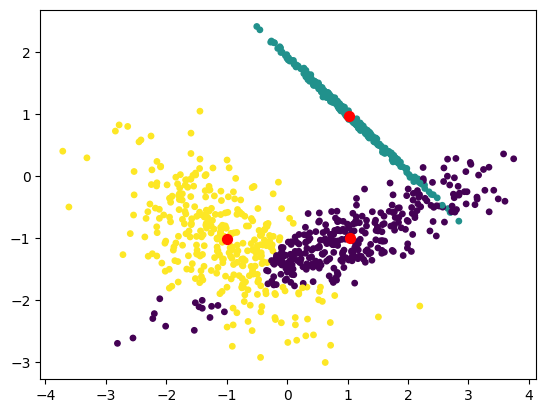

In [46]:
plt.scatter(X1[:,0], X1[:,1], c=gm1.predict(X1), marker="o", s=15)
plt.scatter(gm1.means_[:,0], gm1.means_[:,1], s=50, c='red')

In [99]:
print("Rand", rand_score(y1, gm1.predict(X1)))
print("Jaccard", jaccard_score(y1, gm1.predict(X1), average="micro"))
print("Calinsky_harabasz", calinski_harabasz_score(X1, gm1.predict(X1)))
print("davies_bouldin", davies_bouldin_score(X1, gm1.predict(X1)))

Rand 0.880980980980981
Jaccard 0.17164616285881665
Calinsky_harabasz 817.5611240506082
davies_bouldin 0.8830097245117824


In [47]:
gm2 = GaussianMixture(n_components=4).fit(X2)

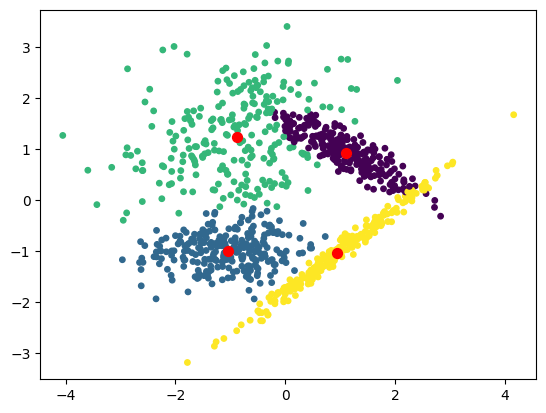

In [48]:
plt.scatter(X2[:,0], X2[:,1], c=gm2.predict(X2), marker="o", s=15)
plt.scatter(gm2.means_[:,0], gm2.means_[:,1], s=50, c='red')

In [98]:
print("Rand", rand_score(y2, gm2.predict(X2)))
print("Jaccard", jaccard_score(y2, gm2.predict(X2), average="micro"))
print("Calinsky_harabasz", calinski_harabasz_score(X2, gm2.predict(X2)))
print("davies_bouldin", davies_bouldin_score(X2, gm2.predict(X2)))

Rand 0.934056056056056
Jaccard 0.12612612612612611
Calinsky_harabasz 716.1693852321988
davies_bouldin 0.8092870826526971


DBSCAN

In [11]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

In [50]:
nbrs = NearestNeighbors(n_neighbors=4).fit(X)
distances, indices = nbrs.kneighbors(X)
distances = np.mean(distances, axis=1)
distances = np.sort(distances)

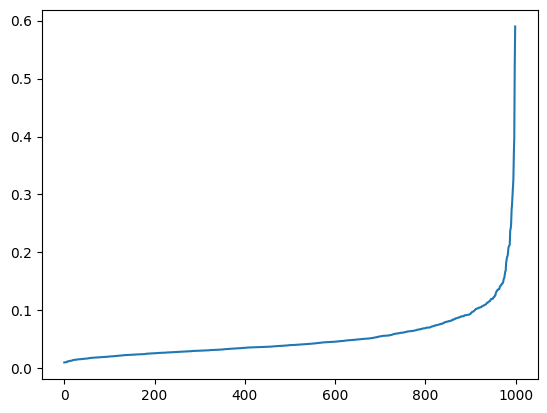

In [51]:
plt.plot(distances)

In [52]:
dbscan = DBSCAN(eps=0.2, min_samples=4).fit(X)

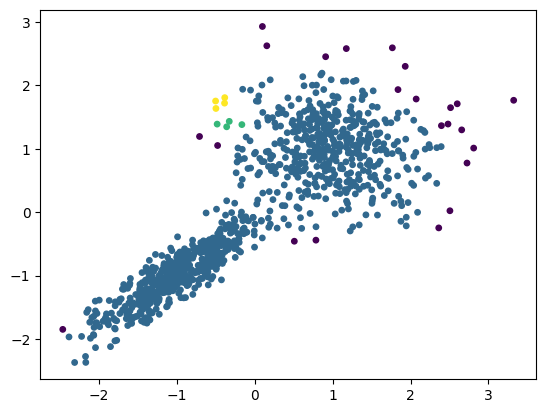

In [53]:
plt.scatter(X[:,0], X[:,1], c=dbscan.labels_, marker="o", s=15)

In [97]:
print("Rand", rand_score(y, dbscan.labels_))
print("Jaccard", jaccard_score(y, dbscan.labels_, average="micro"))
print("Calinsky_harabasz", calinski_harabasz_score(X, dbscan.labels_))
print("davies_bouldin", davies_bouldin_score(X, dbscan.labels_))

Rand 0.5007007007007007
Jaccard 0.3080444735120994
Calinsky_harabasz 14.71736158836784
davies_bouldin 1.257086791638223


In [54]:
nbrs = NearestNeighbors(n_neighbors=6).fit(X1)
distances, indices = nbrs.kneighbors(X1)
distances = np.mean(distances, axis=1)
distances = np.sort(distances)

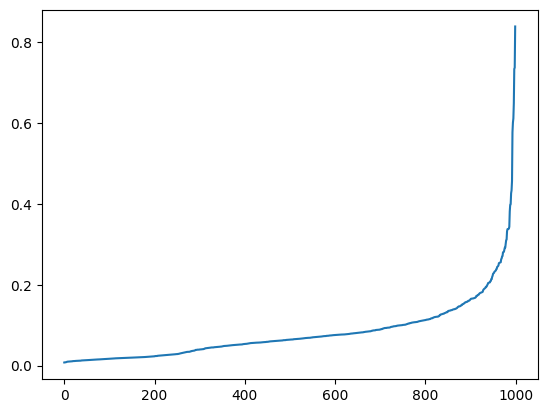

In [55]:
plt.plot(distances)

In [56]:
dbscan1 = DBSCAN(eps=0.1, min_samples=6).fit(X1)

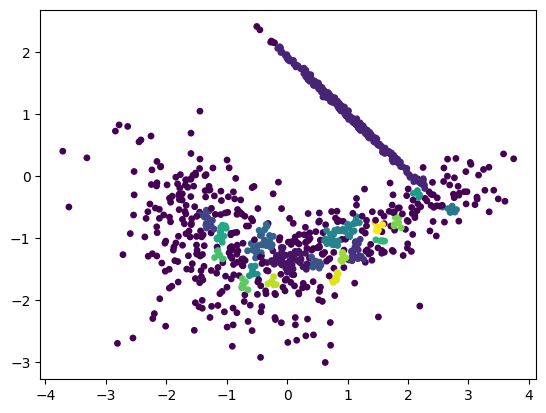

In [57]:
plt.scatter(X1[:,0], X1[:,1], c=dbscan1.labels_, marker="o", s=15)

In [96]:
print("Rand", rand_score(y1, dbscan1.labels_))
print("Jaccard", jaccard_score(y, dbscan.labels_, average="micro"))
print("Calinsky_harabasz", calinski_harabasz_score(X1, dbscan1.labels_))
print("davies_bouldin", davies_bouldin_score(X1, dbscan1.labels_))

Rand 0.7493813813813813
Jaccard 0.3080444735120994
Calinsky_harabasz 40.69102216534959
davies_bouldin 2.1935355875871005


In [58]:
nbrs = NearestNeighbors(n_neighbors=6).fit(X2)
distances, indices = nbrs.kneighbors(X2)
distances = np.mean(distances, axis=1)
distances = np.sort(distances)

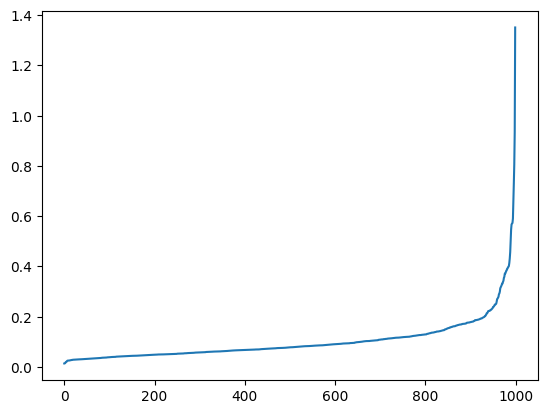

In [59]:
plt.plot(distances)

In [12]:
dbscan2 = DBSCAN(eps=0.2, min_samples=8).fit(X2)

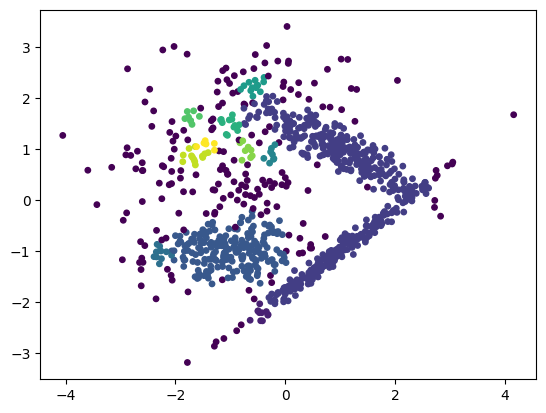

In [13]:
plt.scatter(X2[:,0], X2[:,1], c=dbscan2.labels_, marker="o", s=15)

In [17]:
print("Rand", rand_score(y2, dbscan2.labels_))
print("Jaccard", jaccard_score(y, dbscan2.labels_, average="micro"))
print("Calinsky_harabasz", calinski_harabasz_score(X2, dbscan2.labels_))
print("davies_bouldin", davies_bouldin_score(X2, dbscan2.labels_))

Rand 0.7548048048048048
Jaccard 0.15074798619102417
Calinsky_harabasz 76.5987325593346
davies_bouldin 2.141700716212131


Hierarchy clustering

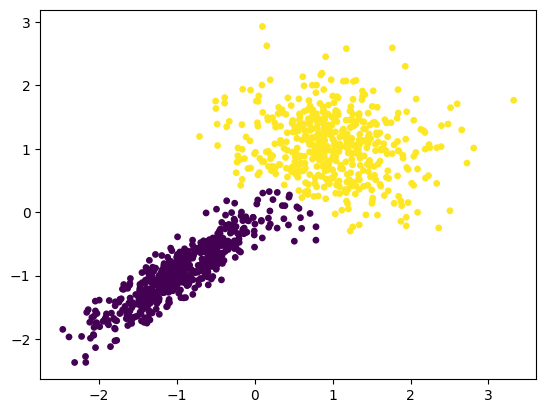

In [62]:
from sklearn.cluster import AgglomerativeClustering

hierachy = AgglomerativeClustering(n_clusters=2, linkage="ward").fit(X)
plt.scatter(X[:,0], X[:,1], c=hierachy.labels_, marker="o", s=15)

In [83]:
print("Rand", rand_score(y, hierachy.labels_))
print("Jaccard", jaccard_score(y, hierachy.labels_))
print("Calinsky_harabasz", calinski_harabasz_score(X, hierachy.labels_))
print("davies_bouldin", davies_bouldin_score(X, hierachy.labels_))

Rand 0.9474054054054054
Jaccard 0.005112474437627812
Calinsky_harabasz 3147.8864409536427
davies_bouldin 0.4776752550266907


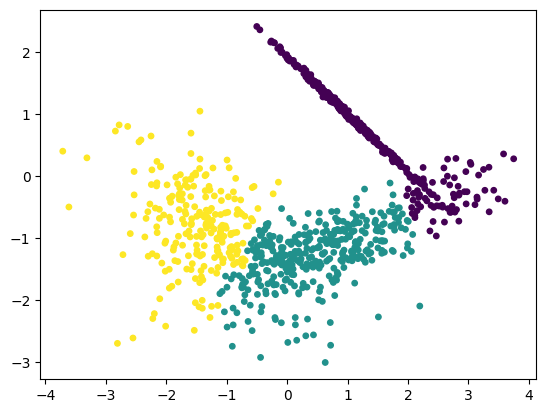

In [63]:
hierachy1 = AgglomerativeClustering(n_clusters=3, linkage="ward").fit(X1)
plt.scatter(X1[:,0], X1[:,1], c=hierachy1.labels_, marker="o", s=15)

In [87]:
print("Rand", rand_score(y1, hierachy1.labels_))
print("Jaccard", jaccard_score(y1, hierachy1.labels_, average="micro"))
print("Calinsky_harabasz", calinski_harabasz_score(X1, hierachy1.labels_))
print("davies_bouldin", davies_bouldin_score(X1, hierachy1.labels_))

Rand 0.7819119119119119
Jaccard 0.10680686220254565
Calinsky_harabasz 1043.36256062681
davies_bouldin 0.7747406824034563


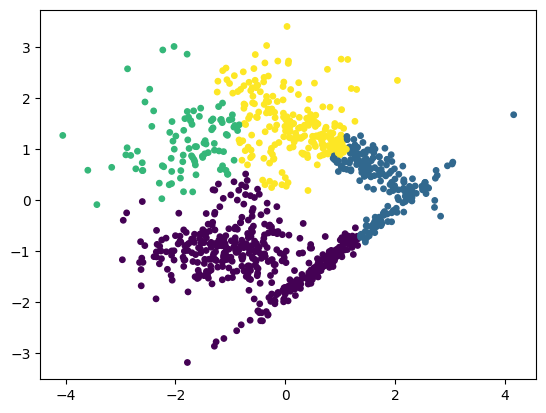

In [64]:
hierachy2 = AgglomerativeClustering(n_clusters=4, linkage="complete").fit(X2)
plt.scatter(X2[:,0], X2[:,1], c=hierachy2.labels_, marker="o", s=15)

In [88]:
print("Rand", rand_score(y2, hierachy2.labels_))
print("Jaccard", jaccard_score(y2, hierachy2.labels_, average="micro"))
print("Calinsky_harabasz", calinski_harabasz_score(X2, hierachy2.labels_))
print("davies_bouldin", davies_bouldin_score(X2, hierachy2.labels_))

Rand 0.7276016016016016
Jaccard 0.37551581843191195
Calinsky_harabasz 787.2994676367529
davies_bouldin 0.7389358117684434


SOM

In [65]:
from sklearn_som.som import SOM

In [66]:
som = SOM(m=2, n=1, dim=2)
som.fit(X)

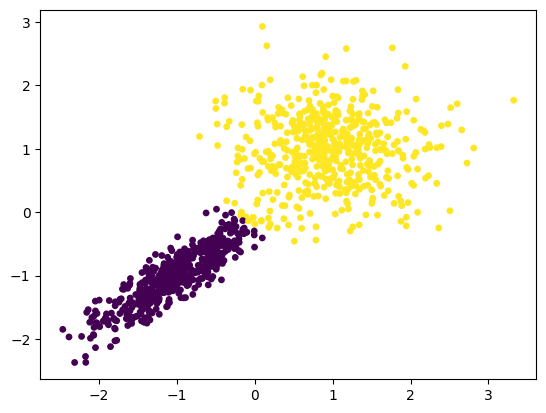

In [67]:
plt.scatter(X[:,0], X[:,1], c=som.predict(X), marker="o", s=15)

In [93]:
print("Rand", rand_score(y, som.predict(X)))
print("Jaccard", jaccard_score(y, som.predict(X)))
print("Calinsky_harabasz", calinski_harabasz_score(X, som.predict(X)))
print("davies_bouldin", davies_bouldin_score(X, som.predict(X)))

Rand 0.9417417417417417
Jaccard 0.02512562814070352
Calinsky_harabasz 3335.136420128883
davies_bouldin 0.4646474594957608


In [68]:
som1 = SOM(m=3, n=1, dim=2)
som1.fit(X1)

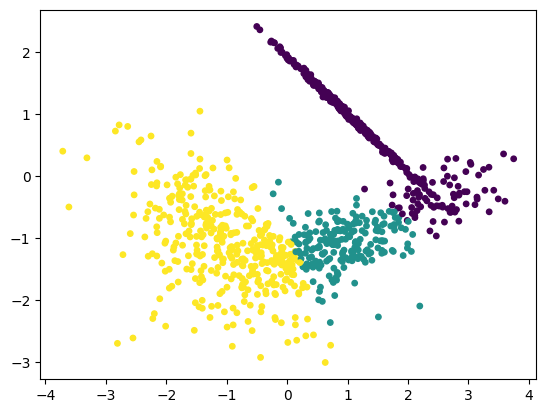

In [69]:
plt.scatter(X1[:,0], X1[:,1], c=som1.predict(X1), marker="o", s=15)

In [94]:
print("Rand", rand_score(y1, som1.predict(X1)))
print("Jaccard", jaccard_score(y1, som1.predict(X1), average="micro"))
print("Calinsky_harabasz", calinski_harabasz_score(X1, som1.predict(X1)))
print("davies_bouldin", davies_bouldin_score(X1, som1.predict(X1)))

Rand 0.7927387387387388
Jaccard 0.059322033898305086
Calinsky_harabasz 987.9423825838102
davies_bouldin 0.77316107578105


In [70]:
som2 = SOM(m=4, n=1, dim=2)
som2.fit(X2)


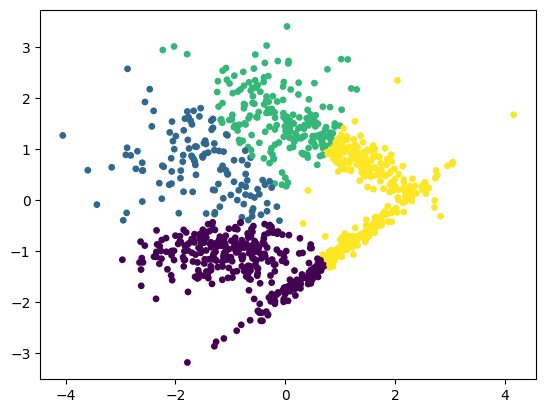

In [71]:
plt.scatter(X2[:,0], X2[:,1], c=som2.predict(X2), marker="o", s=15)

In [95]:
print("Rand", rand_score(y2, som2.predict(X2)))
print("Jaccard", jaccard_score(y2, som2.predict(X2), average="micro"))
print("Calinsky_harabasz", calinski_harabasz_score(X2, som2.predict(X2)))
print("davies_bouldin", davies_bouldin_score(X2, som2.predict(X2)))

Rand 0.7683463463463464
Jaccard 0.34861766689143625
Calinsky_harabasz 836.9775453716626
davies_bouldin 0.8852664941723509
